<a href="https://colab.research.google.com/github/yasmine-oukemoum/School-Price-Analysis/blob/main/Concatination_of_all_the_courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
brainer=pd.read_csv('BrainerX_courses.csv')
code213=pd.read_csv('code213.csv')
fluently=pd.read_csv('fluently_courses.csv')
gomycode=pd.read_csv('gomycode.csv')
socode=pd.read_csv('socodeschool.csv')

In [ ]:
print(brainer.columns)
print(code213.columns)
print(fluently.columns)
print(gomycode.columns)
print(socode.columns)

Index(['Course Domain', 'Course Title', 'Total Duration', 'Price', 'School'], dtype='object')
Index(['Course Title', 'Course Description', 'Weekly Hours', 'Total Duration',
       'Price', 'School'],
      dtype='object')
Index(['Domain', 'Title', 'Price', 'School'], dtype='object')
Index(['Course Type', 'Course Title', 'Course Duration', 'Hours per Week',
       'Unnamed: 4', 'Price', 'School'],
      dtype='object')
Index(['Course Title', 'Weekly Hours', 'Total Duration', 'Price', 'School'], dtype='object')


In [ ]:
brainer=brainer.rename(columns={"Course Title":"Title"})
brainer=brainer.rename(columns={"Course Domain":"Domain"})
brainer=brainer.rename(columns={"Total Duration":"Duration"})

In [ ]:
code213=code213.rename(columns={"Course Title":"Title"})
code213["Domain"]="Informatique"
code213=code213.drop(columns=["Course Description"])
code213=code213.drop(columns=["Weekly Hours"])
code213=code213.rename(columns={"Total Duration":"Duration"})

In [ ]:
socode=socode.rename(columns={"Course Title":"Title"})
socode=socode.drop(columns=['Weekly Hours'])
socode=socode.rename(columns={"Total Duration":"Duration"})
socode["Domain"]="Computer Science"

In [ ]:
gomycode=gomycode.rename(columns={"Course Title":"Title"})
gomycode=gomycode.rename(columns={"Course Type":"Domain"})
gomycode=gomycode.rename(columns={"Course Duration":"Duration"})
gomycode=gomycode.drop(columns=["Hours per Week"])
gomycode=gomycode.drop(columns=["Unnamed: 4"])

In [ ]:
Data=pd.concat([socode,gomycode,code213,fluently,brainer])

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     106 non-null    object
 1   Duration  89 non-null     object
 2   Price     106 non-null    object
 3   School    106 non-null    object
 4   Domain    106 non-null    object
dtypes: object(5)
memory usage: 5.0+ KB


In [ ]:
Data["Price"] = Data["Price"].replace("Not specified", pd.NA)
Data["Price"] = Data["Price"].replace("Closed", pd.NA)
Data["Price"] = Data["Price"].replace("Not found", pd.NA)

In [ ]:
Data["Price"] = Data["Price"].str.replace(r'\D', '', regex=True)

In [ ]:
Data["Price"].unique()

array(['39000', '34900', '14900', '150000', '90000', '60000', '80000',
       '129000', '49000', '69000', '29000', '199000', '99000', '3900',
       '6000', <NA>, '4800', '5600', '3500', '25000', '20000', '45000'],
      dtype=object)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     106 non-null    object
 1   Duration  89 non-null     object
 2   Price     69 non-null     object
 3   School    106 non-null    object
 4   Domain    106 non-null    object
dtypes: object(5)
memory usage: 5.0+ KB


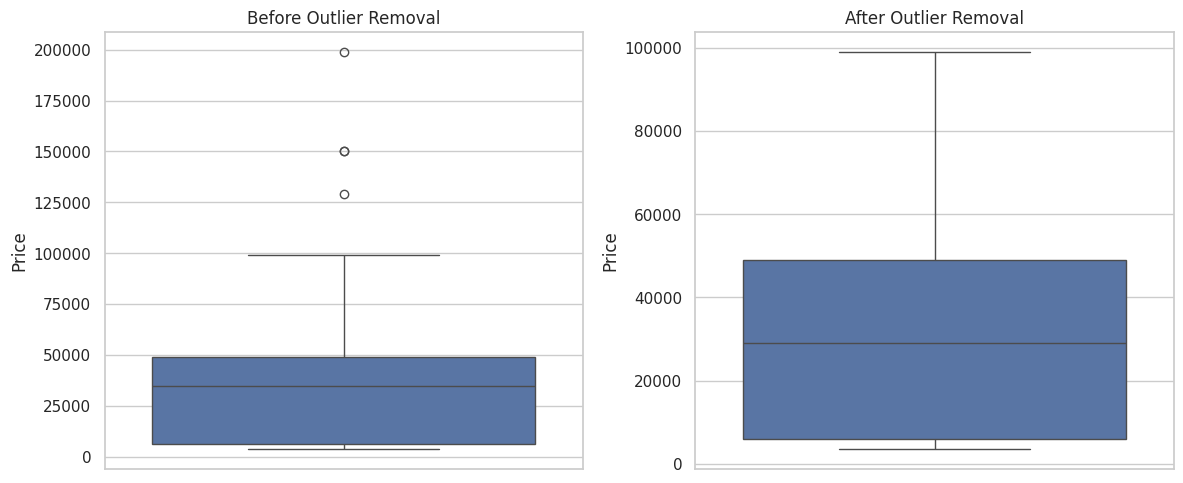

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Handle Missing Values (if any)
Data = Data.dropna(subset=['Price'])  # Drop NaN values
Data['Price'] = pd.to_numeric(Data['Price'], errors='coerce')  # Ensure numeric

# Step 2: Visualize Before Outlier Removal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=Data['Price'])
plt.title("Before Outlier Removal")

# Step 3: Remove Outliers using IQR method
Q1 = Data['Price'].quantile(0.25)
Q3 = Data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Data_cleaned = Data[(Data['Price'] >= lower_bound) & (Data['Price'] <= upper_bound)]

# Step 4: Visualize After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(y=Data_cleaned['Price'])
plt.title("After Outlier Removal")

plt.tight_layout()
plt.savefig("habiba.png")
plt.show()


In [ ]:
# Convert 'Price' and 'Duration' to numeric (coerce converts errors to NaN)
Data["Price"] = pd.to_numeric(Data["Price"], errors='coerce')
Data["Duration"] = pd.to_numeric(Data["Duration"], errors='coerce')

# Option 1: Fill Missing Values with Median
Data["Price"].fillna(Data["Price"].median(), inplace=True)
Data["Duration"].fillna(Data["Duration"].median(), inplace=True)

In [ ]:
Data["Price"] = Data["Price"].replace({pd.NA: np.nan})

In [ ]:
Data["Price"] = Data["Price"].astype('float')

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     106 non-null    object 
 1   Duration  0 non-null      float64
 2   Price     106 non-null    float64
 3   School    106 non-null    object 
 4   Domain    106 non-null    object 
dtypes: float64(2), object(3)
memory usage: 5.0+ KB


In [ ]:
Data["Duration"].unique()

array([nan])

In [ ]:
Data["Duration"] = Data["Duration"].str.replace(r'(\d+)\s*Week?', lambda x: str(int(x.group(1)) * 4), regex=True)


In [ ]:
Data["Duration"].unique()

In [ ]:

Data["Duration"] = Data["Duration"].str.replace(r'(\d+)\s*moi?', lambda x: str(int(x.group(1)) * 12), regex=True)


In [ ]:
Data["Duration"].unique()

In [ ]:
Data["Duration"] = Data["Duration"].str.replace(r'(\d+)\s*Day?', lambda x: str(int(x.group(1)) * 2), regex=True)


In [ ]:
Data["Duration"].unique()

In [ ]:
Data["Duration"] = Data["Duration"].str.replace(r'(\d+)\s*Month?', lambda x: str(int(x.group(1)) * 12), regex=True)


In [ ]:
Data["Duration"].unique()

In [ ]:
Data["Duration"] = Data["Duration"].str.replace(r'\D', '', regex=True)


In [ ]:
Data["Duration"].unique()

In [ ]:
Data["Duration"] = Data["Duration"].replace('', np.nan)

In [ ]:
Data.info()

In [ ]:
Data["Domain"].unique()

In [ ]:
domains = {
    "Informatique": r"(Computer Science|Data|Informatique|Informatique\n8 courses|Workshop|Programmation|Ai)",
    "Langue": r"(Language|Voix Off)",
    "Design": r"(Design|Art|UI/UX|Graphic design)",
    "IT": r"(Workshop|Robotique)"
}

In [ ]:
import re

In [ ]:
def classify_course(course_name):
    for domain, pattern in domains.items():
        if re.search(pattern, course_name, re.IGNORECASE):
            return domain
    return "Marketing"

In [ ]:
Data["Classification"] = Data["Domain"].apply(classify_course)

In [ ]:
Data['Classification'].unique()

In [ ]:
Data['Classification'].value_counts()

In [ ]:
Data.info()

In [ ]:
print(np.mean(Data["Price"]))
print(np.median(Data["Price"]))
print(np.max(Data["Price"]))
print(np.min(Data["Price"]))

38511.59420289855
nan
199000.0
3500.0


Pricing Statistics by Classification:
                        mean   median     min       max
Classification                                         
Informatique    52310.000000  39000.0  3500.0  199000.0
Design          35937.500000  25000.0  3500.0   90000.0
Marketing       28500.000000  25000.0  3500.0   80000.0
Langue           5564.285714   6000.0  3900.0    6000.0


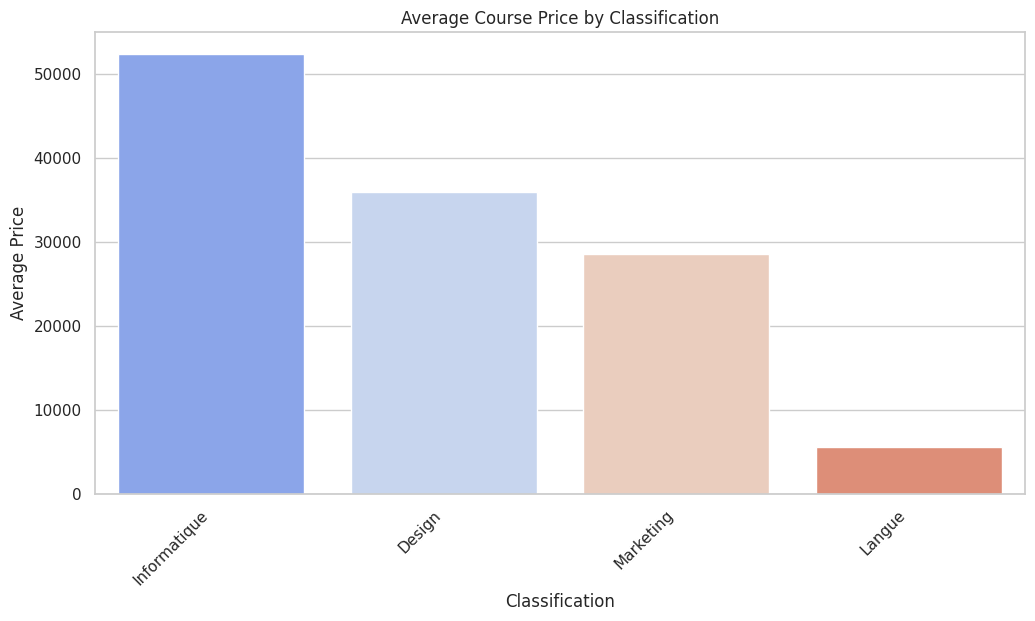

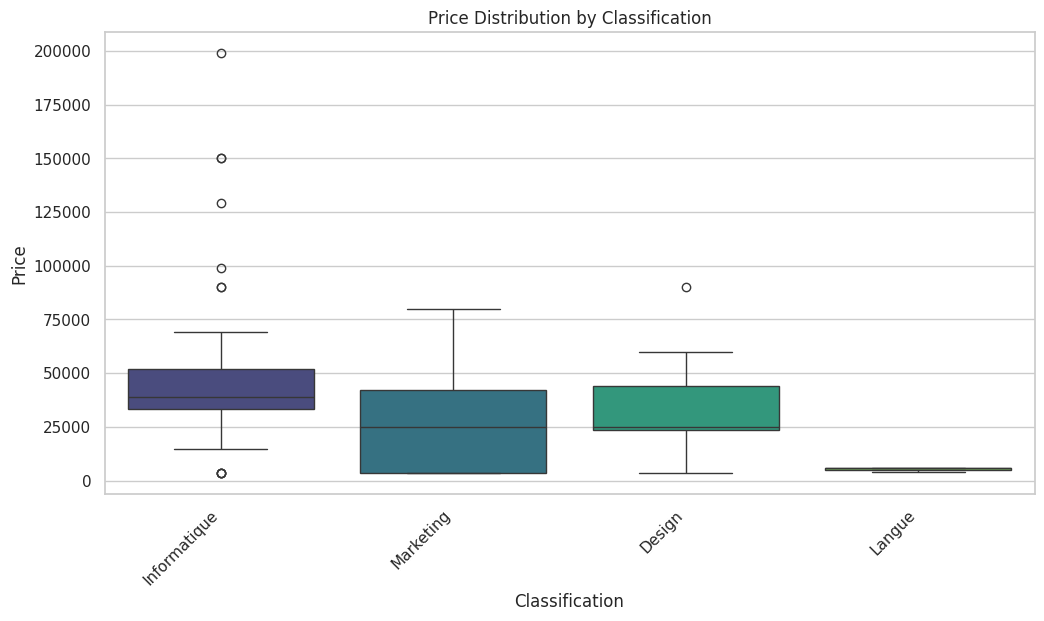

In [ ]:

# Drop missing values for price and Classification
Data = Data.dropna(subset=["Price", "Classification"])

# Convert 'Price' to numeric if needed
Data["Price"] = pd.to_numeric(Data["Price"], errors="coerce")

# Group by Classification and calculate pricing statistics
price_stats = Data.groupby("Classification")["Price"].agg(["mean", "median", "min", "max"]).sort_values(by="mean", ascending=False)

# Print pricing statistics per Classification
print("Pricing Statistics by Classification:")
print(price_stats)

# Bar plot of average prices by Classification
plt.figure(figsize=(12, 6))
sns.barplot(x=price_stats.index, y=price_stats["mean"], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Classification")
plt.ylabel("Average Price")
plt.title("Average Course Price by Classification")
plt.show()

# Box plot to show price distribution per Classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=Data, x="Classification", y="Price", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Classification")
plt.ylabel("Price")
plt.title("Price Distribution by Classification")
plt.show()


Top 5 most popular Classifications:
Classification
Informatique    54
Marketing       18
Langue          18
Design          13
IT               3
Name: count, dtype: int64


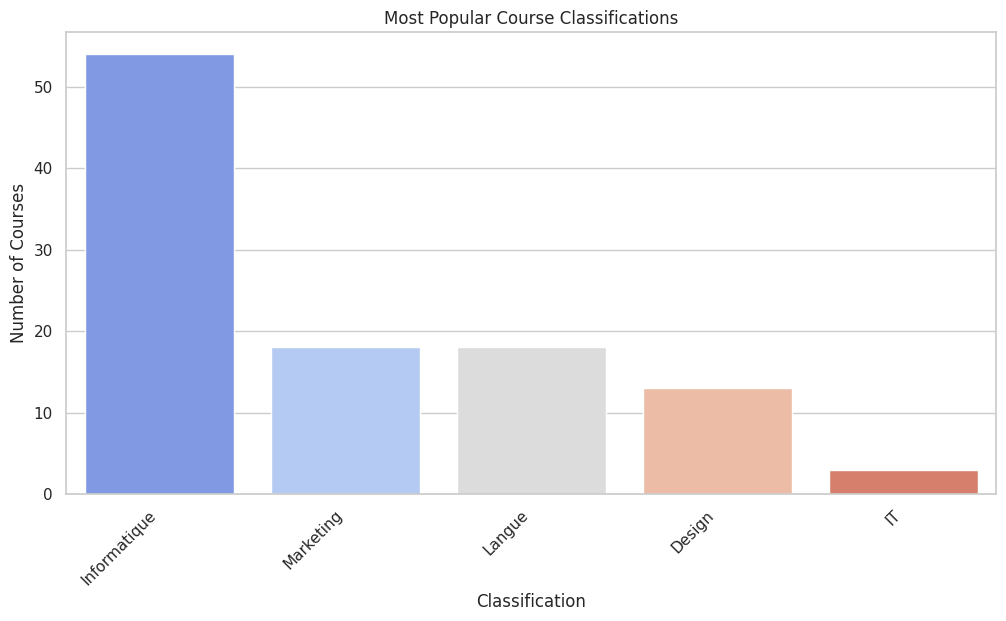

In [ ]:
# Drop missing values in 'Classification' column
Data = Data.dropna(subset=["Classification"])

# Count the number of courses per Classification
Classification_counts = Data["Classification"].value_counts()

# Display the top 5 most popular Classifications
print("Top 5 most popular Classifications:")
print(Classification_counts)

# Plot the top Classifications
plt.figure(figsize=(12, 6))
sns.barplot(x=Classification_counts.index, y=Classification_counts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Classification")
plt.ylabel("Number of Courses")
plt.title("Most Popular Course Classifications")
plt.savefig("tapoupahet.png")
plt.show()

In [ ]:
import seaborn as sns

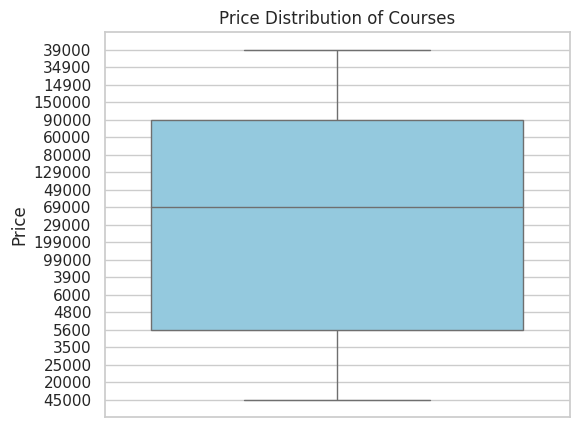

In [ ]:

# Drop missing prices
Data = Data.dropna(subset=["Price"])

sns.set_theme(style="whitegrid")

# Create the box plot
plt.figure(figsize=(6, 5))
sns.boxplot(y=Data["Price"], color="skyblue")

# Add title and labels
plt.title("Price Distribution of Courses")
plt.ylabel("Price")
plt.savefig("lalamoulati.png")
# Show plot
plt.show()


In [ ]:
Data["Price"] = Data.groupby("Duration")["Price"].transform(lambda x: x.fillna(x.mean()))


In [ ]:
Data["Duration"] = Data.groupby("Domain")["Duration"].transform(lambda x: x.fillna(x.mean()))


TypeError: Could not convert string '8' to numeric

In [ ]:
Data = Data.dropna(subset=["Duration"])

In [ ]:
Data.info()

In [ ]:
Data["Duration"]=Data["Duration"].astype('float')

In [ ]:
# Plot price differences by school
plt.figure(figsize=(12, 6))
sns.barplot(data=Data, x="Duration", y="Price", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Price Distribution by Duration")
plt.savefig("hebountassa.png")
plt.show()


In [ ]:
Data["Price"] = Data["Price"].replace(np.nan,np.mean(Data["Price"]))


In [ ]:
Data["Duration"]=Data["Duration"].astype('float')

In [ ]:
Data["Duration"]=Data["Duration"].replace(np.nan,np.mean(Data["Duration"]))

In [ ]:
Data.info()

In [ ]:
print(np.mean(Data["Duration"]))
print(np.median(Data["Duration"]))
print(np.max(Data["Duration"]))
print(np.min(Data["Duration"]))



34.10714285714285
34.107142857142854
80.0
4.0


In [ ]:
# Check correlation coefficient
correlation = Data["Duration"].corr(Data["Price"])
print(f"Correlation between Duration and Price: {correlation:.2f}")

Correlation between Duration and Price: 0.69


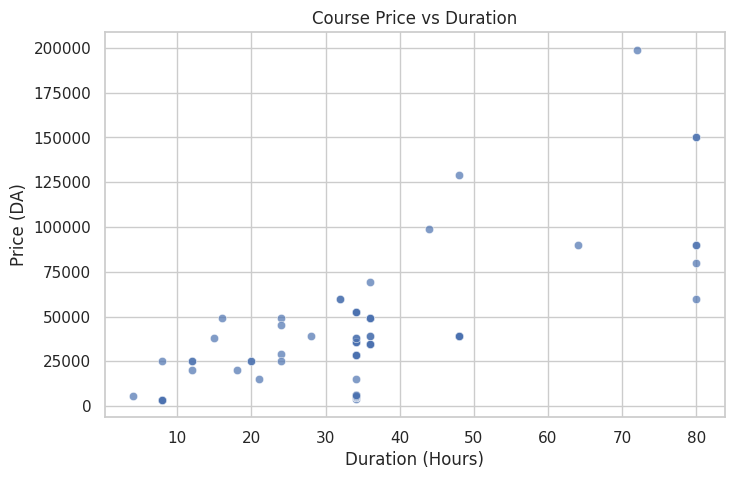

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Data, x="Duration", y="Price", alpha=0.7)
plt.xlabel("Duration (Hours)")
plt.ylabel("Price (DA)")
plt.title("Course Price vs Duration")
plt.savefig("course_price_vs_duration.png")
plt.show()

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           106 non-null    object 
 1   Duration        106 non-null    float64
 2   Price           106 non-null    float64
 3   School          106 non-null    object 
 4   Domain          106 non-null    object 
 5   Classification  106 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.8+ KB


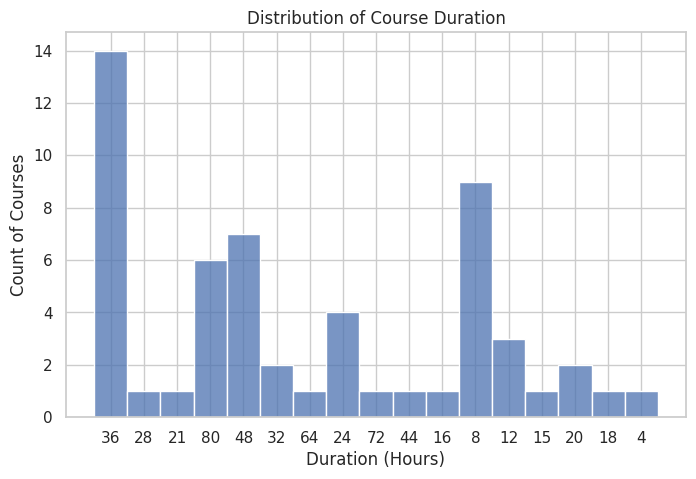

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Data["Duration"], bins=20)
plt.xlabel("Duration (Hours)")
plt.ylabel("Count of Courses")
plt.title("Distribution of Course Duration")
plt.savefig("tachebhatiw.png")
plt.show()

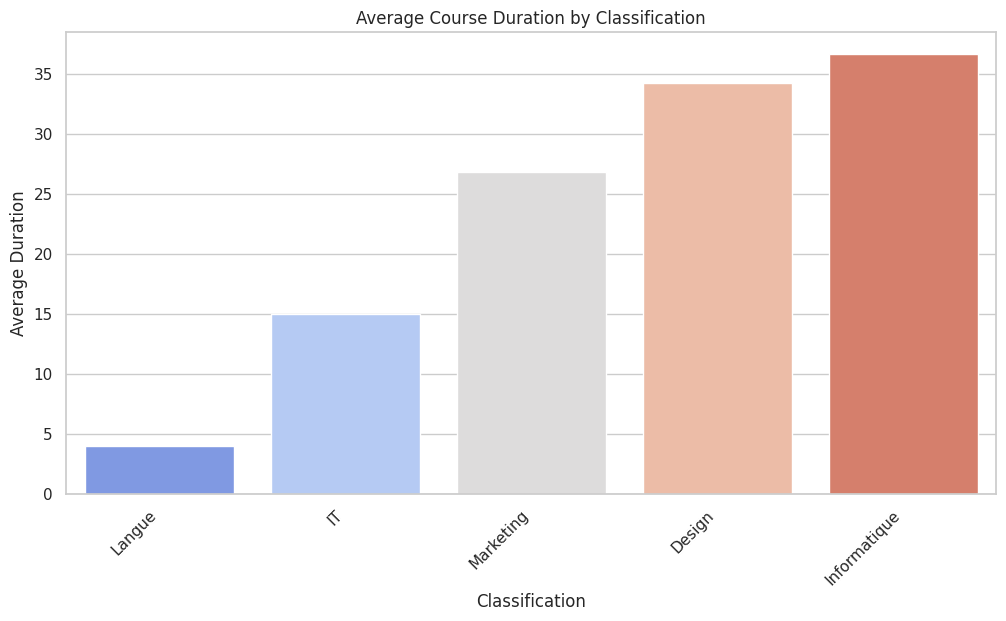

In [ ]:
Data["Duration"] = pd.to_numeric(Data["Duration"], errors="coerce")

# Drop missing values
Data = Data.dropna(subset=["Duration", "Classification"])
avg_duration_by_Classification = Data.groupby("Classification")["Duration"].mean().sort_values()

# Plot bar chart of average duration per Classification
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_Classification.index, y=avg_duration_by_Classification.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Average Course Duration by Classification")
plt.ylabel("Average Duration")
plt.xlabel("Classification")
plt.savefig("average_course_duration_by_classification.png")
plt.show()
